# <center> <div class="alert alert-block alert-info"> <span style="color:crimson;">Audi Car Price Prediction </center>

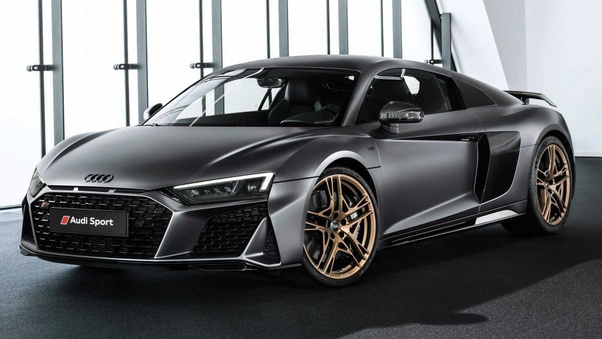

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <center> <div class="alert alert-block alert-info"> <span style="color:crimson;"> Exploratory Data Analysis  </center>

In [ ]:
df = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv")
df.head(n=5)

**Statistical Insights**

In [ ]:
df.describe()

* 1997 to 2020 car price data
* minimum car price 1490 and maximum 145000

In [ ]:
df.info()

# Data Cleaning
**Removing null values and duplicates**

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

In [ ]:
data = df[['model','mileage','price','year']].sort_values(by ='price',ascending=False )
data.head(n=10)

Highest Price of an audi car is model(R8) with 2000 mileage and price 145000

In [ ]:
data = df[['model','tax','price','year']].sort_values(by ='tax',ascending=False )
data.head(n=10)

Highest tax of an audi car is model(R8) with 33950 price and tax 580

In [ ]:
data = df[['model','tax','price','year','mileage']].sort_values(by ='mileage',ascending=False )
data.head(n=10)

Highest mileage of an audi car is model(A6) with 200 tax and price 2490

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['model','transmission','fuelType']
df[col]=df[col].apply(le.fit_transform)
df.head(n=5)

# Data visualisation

In [ ]:
plt.style.use('ggplot')
sns.countplot(x='transmission',data=df)
plt.show()

In [ ]:
sns.countplot(x='fuelType',data=df)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
df['model'].value_counts().plot(kind = 'barh')
plt.show()

In [ ]:
sns.distplot(df['price'],hist=False)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,orient='h')
plt.show()

Many outliers. so using z_score to remove Outliers

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in
a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges
from an overall pattern on a sample.

Z score is an important concept in statistics. Z score is also called standard score. This score helps to
understand if a data value is greater or smaller than mean and how far away it is from the mean. More
specifically, Z score tells how many standard deviations away a data point is from the mean.

In [ ]:
from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

In [ ]:
threshold = 3
print(np.where(zscore > 3))

In [ ]:
df_clean=df
df_clean = df_clean[(zscore<2).all(axis=1)]

In [ ]:
df.shape,df_clean.shape

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_clean,orient='h')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
x = df_clean.drop(['mpg','engineSize','price'],axis=1)
y = df_clean['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)

In [ ]:
print(d_reg.score(x_train,y_train),':Train Prediction')
y_pred = d_reg.predict(x_test)
print(d_reg.score(x_test,y_pred),':test prediction')

In [ ]:
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(d_reg, x_train, y_train, cv=10).mean()
train_scores

In [ ]:
test_scores = cross_val_score(d_reg, x_test, y_test, cv=10).mean()
test_scores

In [ ]:
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['orginal','predicted'])
cal

In [ ]:
print(d_reg.get_depth())
print(d_reg.get_n_leaves())

**RandomForestRegression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(r_reg, x_train, y_train, cv=10).mean()
print('Train Scores',train_scores)
test_scores = cross_val_score(r_reg, x_test, y_test, cv=10).mean()
print('Test scores',test_scores)

**Decision Tree Pre Pruning**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,4,6,8,10,12,14,16,18,20,22],
          'min_samples_split': [2,3,4,5],
          'min_samples_leaf': [1,2]}
p_reg = DecisionTreeRegressor()
gcv = GridSearchCV(estimator=p_reg,param_grid=params)
gcv.fit(x_train,y_train)

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(model, x_train, y_train, cv=10).mean()
print('Train Scores',train_scores)
test_scores = cross_val_score(model, x_test, y_test, cv=10).mean()
print('Test scores',test_scores)